# 02 • EDA of Food Prices 
EDA is an iterative tool that would help us to look into the database and describe it's information.

In this EDA I analyse the data from **food prices**.

## Content
1. Sources selected
2. Describe the data
3. Cleaning data
4. Missing values
5. Analysis and Visualization
6. Additional comments
7. Save clean databases
8. References

## 1. Sources selected

For more info look into the jupyter notebook `01_Datacollection.ipynb` of this repo.

### Food prices
- National Center in Big Data and Cloud Computing (NCBC). (2020). [Pakistan Food Prices](https://opendata.com.pk/dataset/pakistan-food-prices). Open Data Pakistan.


## 2. Describe the data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [2]:
## To install Altair look the following link
##    https://altair-viz.github.io/getting_started/installation.html
# !pip install altair vega_datasets #<--To install using `pip`
# !conda install -c conda-forge altair vega_datasets #<--To install using `conda`

import altair as alt
# alt.renderers.enable('default')
alt.renderers.enable('mimetype')
# print(alt.renderers.active)


RendererRegistry.enable('mimetype')

In [3]:
# Load dataset
file = "https://opendata.com.pk/dataset/ec1f8db6-4f93-4d11-b062-c38ac2a5d603/resource/9b42d48c-b689-44ca-a1df-8cf919c5e1d4/download/wfp_food_prices_pakistan.csv"
df_0 = pd.read_csv(file)

In [4]:
# Save the description of variables
description = df_0.iloc[0].to_dict()
description

{'date': '#date',
 'cmname': '#item+name',
 'unit': '#item+unit',
 'category': '#item+type',
 'price': '#value',
 'currency': '#currency',
 'country': '#country+name',
 'admname': '#adm1+name',
 'adm1id': '#adm1+code',
 'mktname': '#name+market',
 'mktid': nan,
 'cmid': '#item+code',
 'ptid': nan,
 'umid': nan,
 'catid': '#item+type+code',
 'sn': '#meta+id',
 'default': nan}

In [5]:
# Head of database (& drop description's row)
df = df_0.drop([0])
df.head(3)

date                cmname unit            category  price currency  \
1  2004-01-15  Wheat flour - Retail   KG  cereals and tubers   13.0      PKR   
2  2004-02-15  Wheat flour - Retail   KG  cereals and tubers   13.0      PKR   
3  2004-03-15  Wheat flour - Retail   KG  cereals and tubers  14.25      PKR   

    country      admname adm1id mktname  mktid cmid  ptid  umid catid  \
1  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   
2  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   
3  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   

            sn  default  
1  295_58_15_5      NaN  
2  295_58_15_5      NaN  
3  295_58_15_5      NaN

In [6]:
# Variables
print(list(df.columns))

['date', 'cmname', 'unit', 'category', 'price', 'currency', 'country', 'admname', 'adm1id', 'mktname', 'mktid', 'cmid', 'ptid', 'umid', 'catid', 'sn', 'default']


In [7]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7662 entries, 1 to 7662
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7662 non-null   object 
 1   cmname    7662 non-null   object 
 2   unit      7662 non-null   object 
 3   category  7662 non-null   object 
 4   price     7662 non-null   object 
 5   currency  7662 non-null   object 
 6   country   7662 non-null   object 
 7   admname   7662 non-null   object 
 8   adm1id    7662 non-null   object 
 9   mktname   7662 non-null   object 
 10  mktid     7662 non-null   float64
 11  cmid      7662 non-null   object 
 12  ptid      7662 non-null   float64
 13  umid      7662 non-null   float64
 14  catid     7662 non-null   object 
 15  sn        7662 non-null   object 
 16  default   0 non-null      float64
dtypes: float64(4), object(13)
memory usage: 1.1+ MB


In [8]:
## Quantitative variables
df.describe()

mktid    ptid         umid  default
count  7662.000000  7662.0  7662.000000      0.0
mean    292.975333    15.0     9.745236      NaN
std       1.404504     0.0    10.767328      NaN
min     291.000000    15.0     5.000000      NaN
25%     292.000000    15.0     5.000000      NaN
50%     293.000000    15.0     5.000000      NaN
75%     294.000000    15.0     5.000000      NaN
max     295.000000    15.0    51.000000      NaN

In [9]:
# Unique terms per vaeriable (per column)
pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'Column name', 0:'Unique terms'})

Column name  Unique terms
0         date           190
1       cmname            17
2         unit             4
3     category             7
4        price          2988
5     currency             1
6      country             1
7      admname             4
8       adm1id             4
9      mktname             5
10       mktid             5
11        cmid            17
12        ptid             1
13        umid             4
14       catid             7
15          sn            85
16     default             0

Looking into the variables:

In [10]:
# dates
print("- The range of dates goes from  {0} to {1}.".format(df.date.unique().min(), df.date.unique().max()))

- The range of dates goes from  2004-01-15 to 2019-10-15.


In [11]:
# food products
print("- In the database we find {0} different food products:".format(len(df.cmname.unique())))
for i in df.cmname.unique():
    print("    * "+i)

- In the database we find 17 different food products:
    * Wheat flour - Retail
    * Rice (coarse) - Retail
    * Lentils (masur) - Retail
    * Milk - Retail
    * Oil (cooking) - Retail
    * Wheat - Retail
    * Eggs - Retail
    * Sugar - Retail
    * Ghee (artificial) - Retail
    * Rice (basmati, broken) - Retail
    * Poultry - Retail
    * Salt - Retail
    * Fuel (diesel) - Retail
    * Fuel (petrol-gasoline) - Retail
    * Lentils (moong) - Retail
    * Beans(mash) - Retail
    * Wage (non-qualified labour, non-agricultural) - Retail


In [12]:
# measurement units
print("- Different measurement units used:", df.unit.unique())

- Different measurement units used: ['KG' 'L' 'Dozen' 'Day']


In [13]:
# categories of products
print("- Diferent categories of products:")
for i in df.category.unique():
    print("    * "+i)

- Diferent categories of products:
    * cereals and tubers
    * pulses and nuts
    * milk and dairy
    * oil and fats
    * meat, fish and eggs
    * miscellaneous food
    * non-food


In [14]:
# prices
print("- The range of prices goes from a min {0} until a max {1}, and it's average is {2}".format(df.price.unique().min(),
                                                                                      df.price.unique().max(),
                                                                 np.round(pd.to_numeric(df.price).mean(), 2)))

- The range of prices goes from a min 10.0 until a max 997.0, and it's average is 106.92


In [15]:
# currency and country
print("- The used currency is {0} and it belongs to the country of {1}.".format(df.currency.unique()[0],
                                                                             df.country.unique()[0]))

- The used currency is PKR and it belongs to the country of Pakistan.


In [16]:
# administrative units (provinces) of Pakistan
print("- Names of administrative units of Pakistan:")
for i in df.admname.unique():
    print("    * "+i)

print("\n- ID f administrative units:")
for i in df.adm1id.unique():
    print("    * "+i)

- Names of administrative units of Pakistan:
    * Balochistan
    * Khyber Pakhtunkhwa
    * Punjab
    * Sindh

- ID f administrative units:
    * 2272
    * 2275
    * 2276
    * 2277


In [17]:
# market
print("- Name of markets:")
for i in df.mktname.unique():
    print("    * "+i)

print("\n- ID of markets:")
for i in df.mktid.unique():
    print("    * "+str(int(i)))

- Name of markets:
    * Quetta
    * Peshawar
    * Lahore
    * Multan
    * Karachi

- ID of markets:
    * 295
    * 294
    * 291
    * 292
    * 293


In [18]:
# item codes
print("- ID of products:", df.cmid.unique())

- ID of products: ['58' '60' '61' '81' '82' '84' '92' '97' '106' '122' '138' '185' '284'
 '285' '325' '326' '465']


In [19]:
# unidentified information
print("- Unique values of column 'ptid':",df.ptid.unique())
print("\n- Unique values of column 'umid':",df.umid.unique())
print("\n- Unique values of column 'catid':",df.catid.unique())
print("\n- Unique values of column 'default':",df.default.unique())
print("\n- Unique values of column 'sn':",df.sn.unique())

- Unique values of column 'ptid': [15.]

- Unique values of column 'umid': [ 5. 15. 35. 51.]

- Unique values of column 'catid': ['1' '5' '3' '6' '2' '7' '8']

- Unique values of column 'default': [nan]

- Unique values of column 'sn': ['295_58_15_5' '295_60_15_5' '295_61_15_5' '295_81_15_15' '295_82_15_15'
 '295_84_15_5' '295_92_15_35' '295_97_15_5' '295_106_15_5' '295_122_15_5'
 '295_138_15_5' '295_185_15_5' '295_284_15_15' '295_285_15_15'
 '295_325_15_5' '295_326_15_5' '295_465_15_51' '294_58_15_5' '294_60_15_5'
 '294_61_15_5' '294_81_15_15' '294_82_15_15' '294_84_15_5' '294_92_15_35'
 '294_97_15_5' '294_106_15_5' '294_122_15_5' '294_138_15_5' '294_185_15_5'
 '294_284_15_15' '294_285_15_15' '294_325_15_5' '294_326_15_5'
 '294_465_15_51' '291_58_15_5' '291_60_15_5' '291_61_15_5' '291_81_15_15'
 '291_82_15_15' '291_84_15_5' '291_92_15_35' '291_97_15_5' '291_106_15_5'
 '291_122_15_5' '291_138_15_5' '291_185_15_5' '291_284_15_15'
 '291_285_15_15' '291_325_15_5' '291_326_15_5' '291_465_1

## 3. Missing values

In [20]:
# Look for missing values
df.isnull().sum()

date           0
cmname         0
unit           0
category       0
price          0
currency       0
country        0
admname        0
adm1id         0
mktname        0
mktid          0
cmid           0
ptid           0
umid           0
catid          0
sn             0
default     7662
dtype: int64

__Note:__<br>
Only the variable `default`, has null values (`nan`). For all the other variables, there is none missing value.

## 4. Cleaning data


In [21]:
# upadte the index of the database
df.reset_index(drop=True, inplace=True)

In [22]:
df.head()

date                cmname unit            category  price currency  \
0  2004-01-15  Wheat flour - Retail   KG  cereals and tubers   13.0      PKR   
1  2004-02-15  Wheat flour - Retail   KG  cereals and tubers   13.0      PKR   
2  2004-03-15  Wheat flour - Retail   KG  cereals and tubers  14.25      PKR   
3  2004-04-15  Wheat flour - Retail   KG  cereals and tubers   12.5      PKR   
4  2004-05-15  Wheat flour - Retail   KG  cereals and tubers  13.25      PKR   

    country      admname adm1id mktname  mktid cmid  ptid  umid catid  \
0  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   
1  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   
2  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   
3  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   
4  Pakistan  Balochistan   2272  Quetta  295.0   58  15.0   5.0     1   

            sn  default  
0  295_58_15_5      NaN  
1  295_58_15_5      NaN  
2  295_58_15_5      NaN  
3  295_58_15_5      NaN  
4  295_58_15_5      NaN

In [23]:
# Delete the variable 'default' that only has NaN, and other variables taht are ID's and 
#   we won't use it: 'adm1id', 'mktid', 'cmid', 'ptid', 'umid', 'catid', 'sn'
try:
    df.drop(columns=['default', 'adm1id', 'mktid', 'cmid', 'ptid', 'umid', 'catid', 'sn'], inplace=True)
except:
    next
    
df.head()

date                cmname unit            category  price currency  \
0  2004-01-15  Wheat flour - Retail   KG  cereals and tubers   13.0      PKR   
1  2004-02-15  Wheat flour - Retail   KG  cereals and tubers   13.0      PKR   
2  2004-03-15  Wheat flour - Retail   KG  cereals and tubers  14.25      PKR   
3  2004-04-15  Wheat flour - Retail   KG  cereals and tubers   12.5      PKR   
4  2004-05-15  Wheat flour - Retail   KG  cereals and tubers  13.25      PKR   

    country      admname mktname  
0  Pakistan  Balochistan  Quetta  
1  Pakistan  Balochistan  Quetta  
2  Pakistan  Balochistan  Quetta  
3  Pakistan  Balochistan  Quetta  
4  Pakistan  Balochistan  Quetta

In [24]:
# look on the variable type
df.dtypes

date        object
cmname      object
unit        object
category    object
price       object
currency    object
country     object
admname     object
mktname     object
dtype: object

In [25]:
# transform variables

# 'price' to numeric
try:
    df = df.astype({'price':'float'})
except:
    next
    
# 'date' to datetime
try:
    df.date = [datetime.strptime(i, '%Y-%m-%d') for i in df.date]
except:
    next
    
df.dtypes

date        datetime64[ns]
cmname              object
unit                object
category            object
price              float64
currency            object
country             object
admname             object
mktname             object
dtype: object

In [26]:
# food product
# note: here we delete the text "- Retail" that each food product
#       in order to make it easier to work with

try:
    cmname_list = list()
    for i in df.cmname.unique():
        cmname_list.append(re.sub(" - Retail", "", i))
    cmname_list

    cmname_dict = dict(zip(list(df.cmname.unique()), cmname_list))

    df['producto'] = df['cmname'].map(cmname_dict)
    df.drop(columns=['cmname'], inplace=True)
except:
    next
    
df.head()

date unit            category  price currency   country      admname  \
0 2004-01-15   KG  cereals and tubers  13.00      PKR  Pakistan  Balochistan   
1 2004-02-15   KG  cereals and tubers  13.00      PKR  Pakistan  Balochistan   
2 2004-03-15   KG  cereals and tubers  14.25      PKR  Pakistan  Balochistan   
3 2004-04-15   KG  cereals and tubers  12.50      PKR  Pakistan  Balochistan   
4 2004-05-15   KG  cereals and tubers  13.25      PKR  Pakistan  Balochistan   

  mktname     producto  
0  Quetta  Wheat flour  
1  Quetta  Wheat flour  
2  Quetta  Wheat flour  
3  Quetta  Wheat flour  
4  Quetta  Wheat flour

In [27]:
# General information, 2nd view
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7662 non-null   datetime64[ns]
 1   unit      7662 non-null   object        
 2   category  7662 non-null   object        
 3   price     7662 non-null   float64       
 4   currency  7662 non-null   object        
 5   country   7662 non-null   object        
 6   admname   7662 non-null   object        
 7   mktname   7662 non-null   object        
 8   producto  7662 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 538.9+ KB


In [28]:
# Quanti variables, 2nd view
df.describe()

price
count  7662.000000
mean    106.919688
std     124.318398
min       9.000000
25%      36.922500
50%      72.730000
75%     138.397500
max     997.000000

In [29]:
# view of database after cleaning 
df.head()

date unit            category  price currency   country      admname  \
0 2004-01-15   KG  cereals and tubers  13.00      PKR  Pakistan  Balochistan   
1 2004-02-15   KG  cereals and tubers  13.00      PKR  Pakistan  Balochistan   
2 2004-03-15   KG  cereals and tubers  14.25      PKR  Pakistan  Balochistan   
3 2004-04-15   KG  cereals and tubers  12.50      PKR  Pakistan  Balochistan   
4 2004-05-15   KG  cereals and tubers  13.25      PKR  Pakistan  Balochistan   

  mktname     producto  
0  Quetta  Wheat flour  
1  Quetta  Wheat flour  
2  Quetta  Wheat flour  
3  Quetta  Wheat flour  
4  Quetta  Wheat flour

## 5. Analysis and Visualization
### Price

In [30]:
source = pd.DataFrame(df.price.value_counts()).reset_index().rename(columns={"index":"Price", "price":"Frequency"})

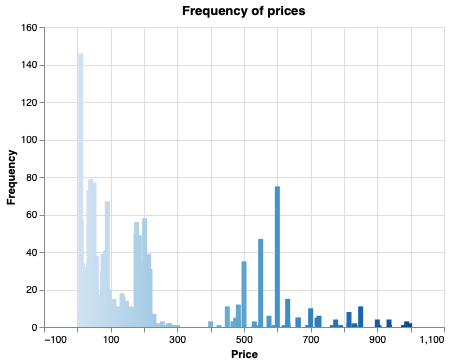

In [31]:
# price, general plot
alt.Chart(source).mark_bar().encode(
    alt.X('Price'),
    alt.Y('Frequency'),
    alt.Color('Price', legend=None),
    tooltip=['Price', 'Frequency']
).properties(title="Frequency of prices")

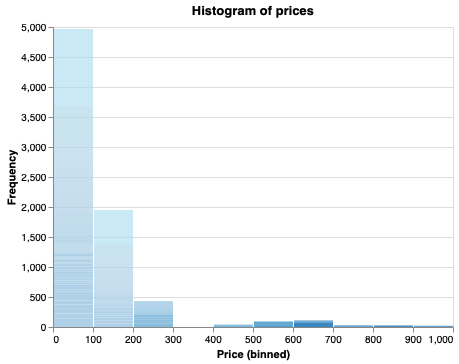

In [32]:
# price, histogram
alt.Chart(source).mark_bar().encode(
    alt.X('Price', bin=True),
    alt.Y('Frequency'),
    alt.Color('Price', bin=True, legend=None),
    tooltip=['Price', 'Frequency']
).properties(title="Histogram of prices")

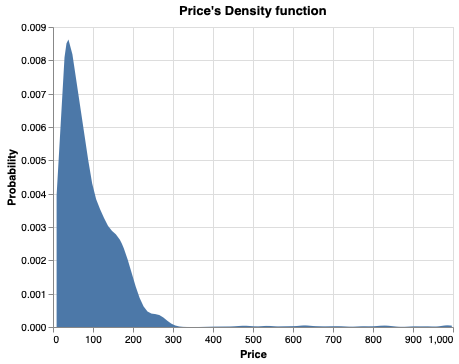

In [33]:
# price, density function
alt.Chart(source).transform_density(
    'Price',
    as_=['Price', 'density'],
).mark_area().encode(
    alt.X("Price:Q"),
    alt.Y('density:Q', title="Probability"),
    tooltip=['Price']
).properties(title="Price's Density function")

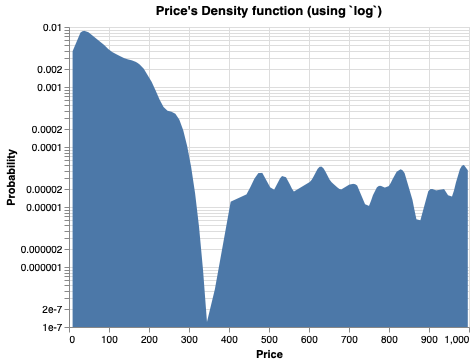

In [34]:
# price, log scale density function
alt.Chart(source).transform_density(
    'Price',
    as_=['Price', 'density'],
).mark_area().encode(
    alt.X("Price:Q"),
    y=alt.Y('density:Q', scale=alt.Scale(type="log"), title="Probability"),
    tooltip=['Price']
).properties(title="Price's Density function (using `log`)")

### Product

In [35]:
source = pd.DataFrame(df.producto.value_counts()).reset_index().rename(columns={"index":"Producto", "producto":"Frequency"})
source

Producto  Frequency
0                                     Wheat flour        950
1                          Rice (basmati, broken)        950
2                                   Rice (coarse)        830
3                                           Wheat        727
4                                           Sugar        392
5                                         Poultry        392
6                                   Oil (cooking)        392
7                               Ghee (artificial)        390
8                                   Fuel (diesel)        350
9                                     Beans(mash)        325
10  Wage (non-qualified labour, non-agricultural)        313
11                                Lentils (masur)        313
12                                           Eggs        298
13                         Fuel (petrol-gasoline)        295
14                                Lentils (moong)        275
15                                           Milk        265
16                                           Salt        205

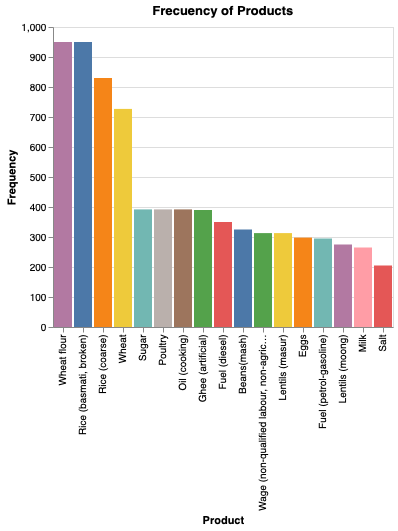

In [36]:
# price, general plot
alt.Chart(source).mark_bar().encode(
    alt.X('Producto',  sort='-y', title="Product"),
    alt.Y('Frequency'),
    alt.Color('Producto', legend=None),
    tooltip=['Producto']
).properties(title="Frecuency of Products")

### Average price of products

In [37]:
source = pd.pivot_table(df, index=["producto"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

producto       price
0                                     Beans(mash)  185.578000
1                                            Eggs   99.988423
2                                   Fuel (diesel)   95.044771
3                          Fuel (petrol-gasoline)   81.484373
4                               Ghee (artificial)  191.696234
5                                 Lentils (masur)  127.984249
6                                 Lentils (moong)  140.332545
7                                            Milk   85.248981
8                                   Oil (cooking)  197.662259
9                                         Poultry  158.132296
10                         Rice (basmati, broken)   55.669482
11                                  Rice (coarse)   42.487590
12                                           Salt   10.612683
13                                          Sugar   59.416403
14  Wage (non-qualified labour, non-agricultural)  618.070969
15                                          Wheat   28.867587
16                                    Wheat flour   29.758635

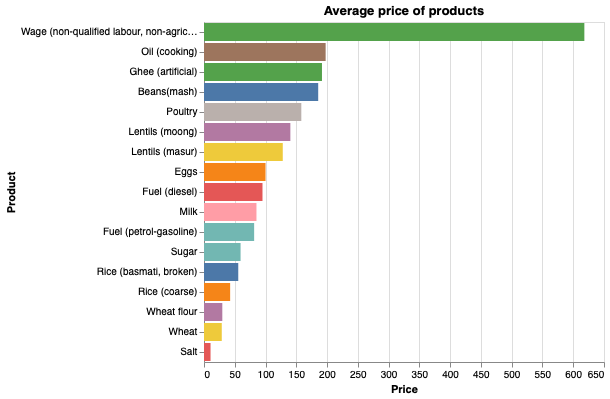

In [38]:
# price of products, general plot
alt.Chart(source).mark_bar().encode(
    alt.Y('producto:N',  sort='-x', title="Product"),
    alt.X('price:Q', title="Price"),
    alt.Color('producto', legend=None),
    tooltip=['producto', 'price']
).properties(title="Average price of products")

⚠️ From the previous analysis of product's price, we can see that the `producto` variable that supose to have information of only food products of the basic basket in Pakistan, but it also considers **Wage**, however, this concept skews our information. For this reason, I will add a step here of `cleaning data` to eliminate the information about `Wage (non-qualified labour, non-agricultural)` from `product` variable.

In [39]:
# eliminate data of `Wage (non-qualified labour, non-agricultural)` from the `product` column
df = df[df.producto!="Wage (non-qualified labour, non-agricultural)"]
df.reset_index(drop=True, inplace=True)

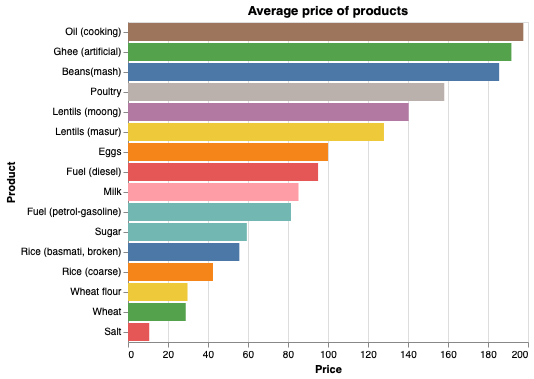

In [40]:
# Again the price of products with out Wage information
source = pd.pivot_table(df, index=["producto"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()

alt.Chart(source).mark_bar().encode(
    alt.Y('producto:N',  sort='-x', title="Product"),
    alt.X('price:Q', title="Price"),
    alt.Color('producto', legend=None),
    tooltip=['producto', 'price']
).properties(title="Average price of products")

### Category

In [41]:
source = pd.DataFrame(df.category.value_counts()).reset_index().rename(columns={"index":"Category", "category":"Frequency"})
source

Category  Frequency
0   cereals and tubers       3457
1      pulses and nuts        913
2         oil and fats        782
3  meat, fish and eggs        690
4             non-food        645
5   miscellaneous food        597
6       milk and dairy        265

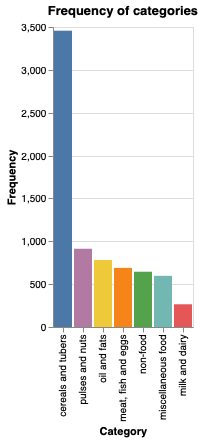

In [42]:
# price, general plot
alt.Chart(source).mark_bar().encode(
    alt.X('Category',  sort='-y'),
    alt.Y('Frequency'),
    alt.Color('Category', legend=None),
    tooltip=['Category', 'Frequency']
).properties(title="Frequency of categories")

### Average price of product along time
#### _Price, Date & Producto_

In [43]:
source = pd.pivot_table(df, index=["date", "producto"], values=["price"], aggfunc=np.mean, fill_value=0).reset_index()
source

date                producto    price
0    2004-01-15  Rice (basmati, broken)  18.8710
1    2004-01-15             Wheat flour  12.5510
2    2004-02-15  Rice (basmati, broken)  18.7540
3    2004-02-15             Wheat flour  12.8040
4    2004-03-15  Rice (basmati, broken)  18.8180
...         ...                     ...      ...
1495 2019-10-15  Rice (basmati, broken)  88.4380
1496 2019-10-15           Rice (coarse)  63.1720
1497 2019-10-15                   Sugar  74.1280
1498 2019-10-15                   Wheat  38.2760
1499 2019-10-15             Wheat flour  45.7326

[1500 rows x 3 columns]

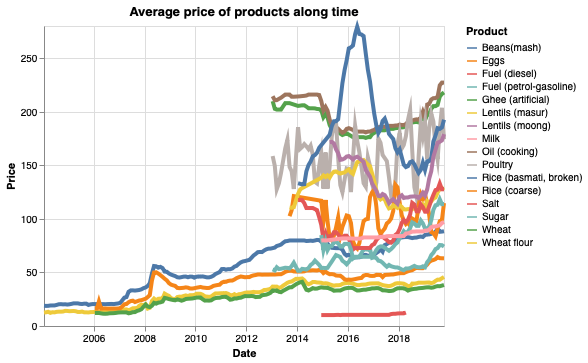

In [44]:
# Plot with all products
plot = alt.Chart(source).mark_line(size = 4).encode(
    alt.X('date:T', title="Date"),
    alt.Y('price:Q', title="Price"),
    alt.Color('producto:N', title="Product"),
    tooltip=['producto', 'date', 'price']
).properties(title="Average price of products along time",
             width=400, height=300
            )
plot

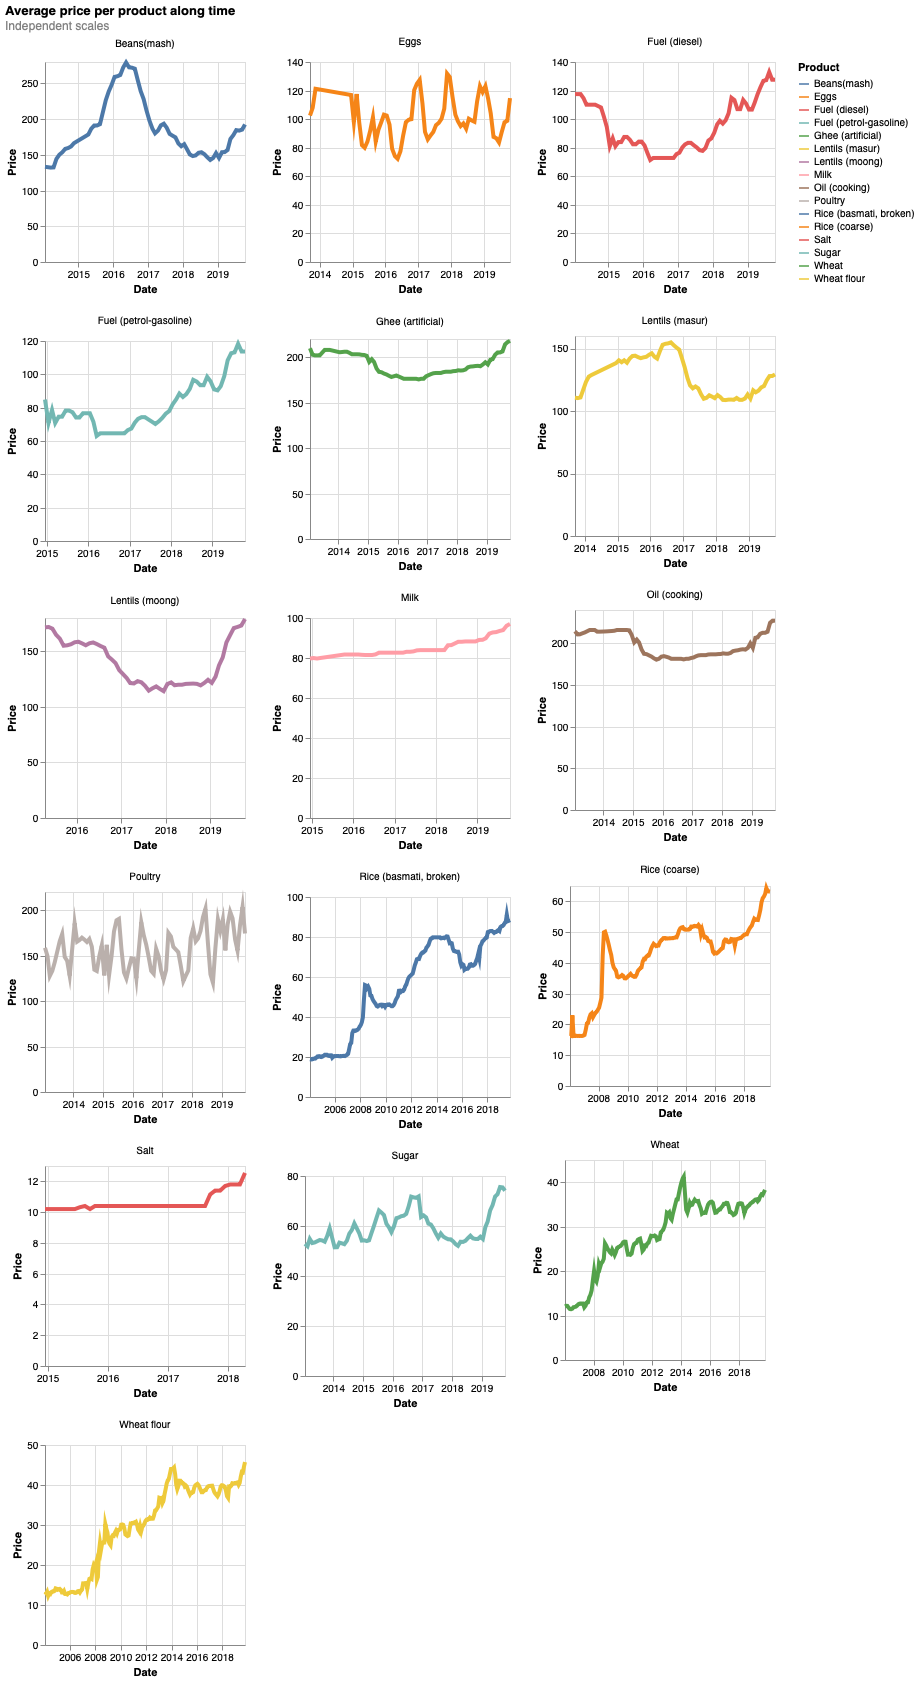

In [45]:
# Plot per product
plot.properties(width=200, height=200).facet(alt.Facet('producto:N', title=None),
            columns=3
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
).properties(title={
      "text": ["Average price per product along time"], 
      "subtitle": ["Independent scales"],
      "color": "black",
      "subtitleColor": "grey"}
    )

### Average price per category of products along time
#### _Price, Date & Category_

In [46]:
source = pd.pivot_table(df, index=["date", "category"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

date            category       price
0   2004-01-15  cereals and tubers   15.711000
1   2004-02-15  cereals and tubers   15.779000
2   2004-03-15  cereals and tubers   16.054000
3   2004-04-15  cereals and tubers   15.709500
4   2004-05-15  cereals and tubers   16.023500
..         ...                 ...         ...
621 2019-10-15      milk and dairy   97.038000
622 2019-10-15  miscellaneous food   74.128000
623 2019-10-15            non-food  120.637000
624 2019-10-15        oil and fats  222.572000
625 2019-10-15     pulses and nuts  166.952667

[626 rows x 3 columns]

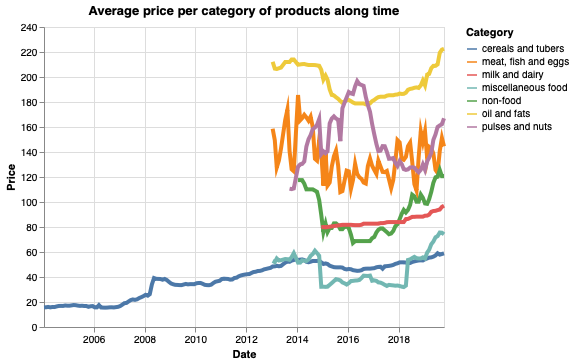

In [47]:
# Plot complete
plot = alt.Chart(source).mark_line(size = 4).encode(
    alt.X('date:T', title="Date"),
    alt.Y('price:Q', title="Price"),
    alt.Color('category:N', title="Category"),
    tooltip=['category', 'date', 'price']
).properties(title="Average price per category of products along time",
                width=400, height=300
    )
plot

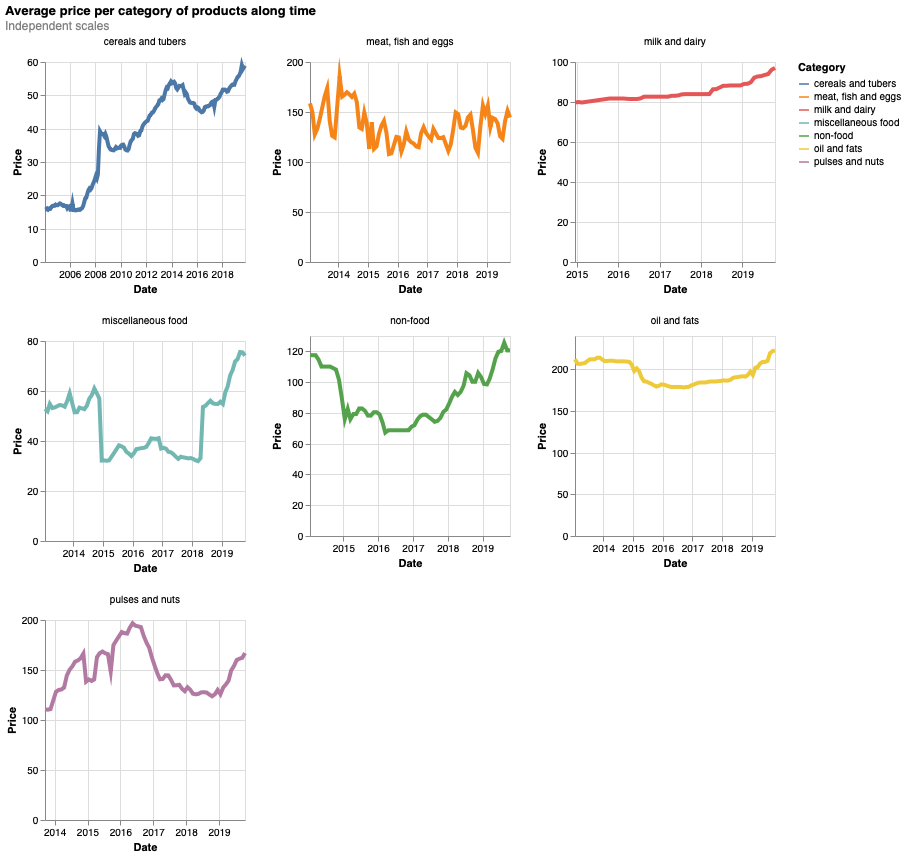

In [48]:
# Plot per category
plot.properties(width=200, height=200).facet(alt.Facet('category:N', title=None),
            columns=3
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
).properties(title={
      "text": ["Average price per category of products along time"], 
      "subtitle": ["Independent scales"],
      "color": "black",
      "subtitleColor": "grey"}         
)

### Price of a category per month and year

In [49]:
source = df.reset_index()

# for this plot I create two new variables: month and year
source['year'] = pd.DatetimeIndex(source['date']).year
source['month'] = pd.DatetimeIndex(source['date']).month

source = pd.pivot_table(source, index=["category", "year", "month"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source.head()

category  year  month    price
0  cereals and tubers  2004      1  15.7110
1  cereals and tubers  2004      2  15.7790
2  cereals and tubers  2004      3  16.0540
3  cereals and tubers  2004      4  15.7095
4  cereals and tubers  2004      5  16.0235

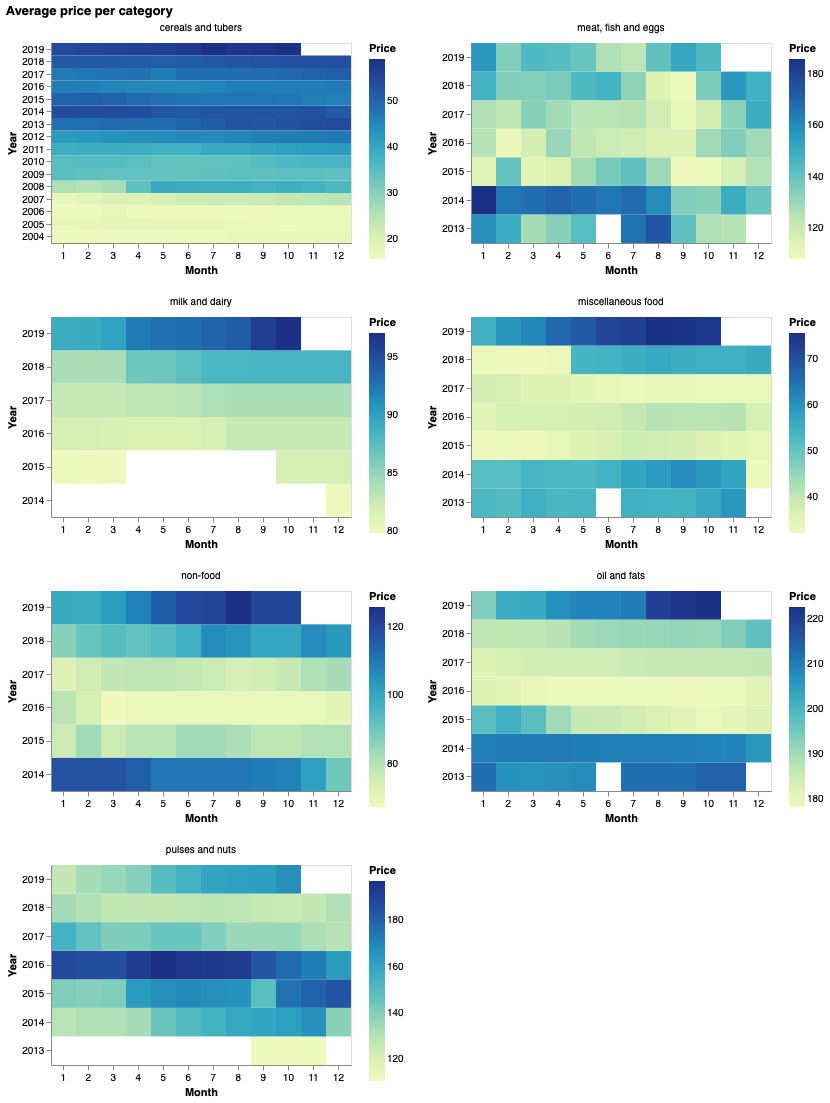

In [50]:
alt.Chart(source).mark_rect().encode(
    alt.X("month:O", title = "Month", axis = alt.Axis(labelAngle = 0)),
    alt.Y('year:O', title = "Year", sort="-y"),
    alt.Color('price:Q', title = "Price"),
    tooltip=['year', 'month', 'price']
).properties(
    width=300, height=200
).facet(alt.Facet('category:N', title=None),
            columns=2
    ).resolve_scale(
        x='independent', 
        y='independent',
        color='independent'
).properties(
    title="Average price per category"
)

### Prices of products per category and year

In [51]:
source = df.reset_index()
source['year'] = pd.DatetimeIndex(source['date']).year
source = pd.pivot_table(source, index=["producto", "category", "year"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source.head()

producto         category  year       price
0  Beans(mash)  pulses and nuts  2014  147.701455
1  Beans(mash)  pulses and nuts  2015  206.681250
2  Beans(mash)  pulses and nuts  2016  256.829500
3  Beans(mash)  pulses and nuts  2017  181.706667
4  Beans(mash)  pulses and nuts  2018  151.292667

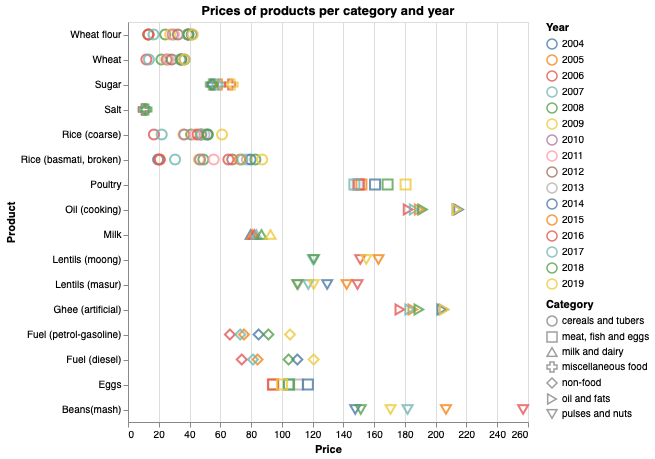

In [52]:
alt.Chart(source).mark_point(opacity=0.8, size=100).encode(
    alt.X("price", title = "Price", axis = alt.Axis(labelAngle = 0)),
    alt.Y('producto', title = "Product", sort="-y"),
    alt.Shape('category:N', title="Category"),
    alt.Color('year:N', title="Year"),
    tooltip=['producto', 'category', 'year', 'price']
).properties(title="Prices of products per category and year", width=400, height=400)

### City

In [53]:
source = pd.pivot_table(df, index=["date", "mktname"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

date   mktname       price
0   2004-01-15   Karachi   16.312500
1   2004-01-15    Lahore   15.450000
2   2004-01-15    Multan   15.500000
3   2004-01-15  Peshawar   14.792500
4   2004-01-15    Quetta   16.500000
..         ...       ...         ...
945 2019-10-15   Karachi  127.796667
946 2019-10-15    Lahore  119.991333
947 2019-10-15    Multan  121.124200
948 2019-10-15  Peshawar  121.908667
949 2019-10-15    Quetta  136.892000

[950 rows x 3 columns]

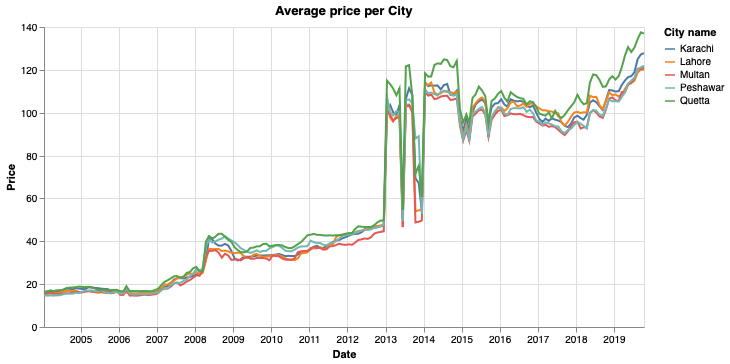

In [54]:
alt.Chart(source).mark_line().encode(
    alt.X("date:T", title="Date"),
    alt.Y("price", title="Price"),
    alt.Color("mktname", title="City name")
).properties(
    title="Average price per City",
    width=600
)

### City and product

In [55]:
source = pd.pivot_table(df, index=["date", "mktname", "category"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

date   mktname            category       price
0    2004-01-15   Karachi  cereals and tubers   16.312500
1    2004-01-15    Lahore  cereals and tubers   15.450000
2    2004-01-15    Multan  cereals and tubers   15.500000
3    2004-01-15  Peshawar  cereals and tubers   14.792500
4    2004-01-15    Quetta  cereals and tubers   16.500000
...         ...       ...                 ...         ...
3091 2019-10-15    Quetta      milk and dairy  110.000000
3092 2019-10-15    Quetta  miscellaneous food   74.800000
3093 2019-10-15    Quetta            non-food  120.640000
3094 2019-10-15    Quetta        oil and fats  224.000000
3095 2019-10-15    Quetta     pulses and nuts  201.333333

[3096 rows x 4 columns]

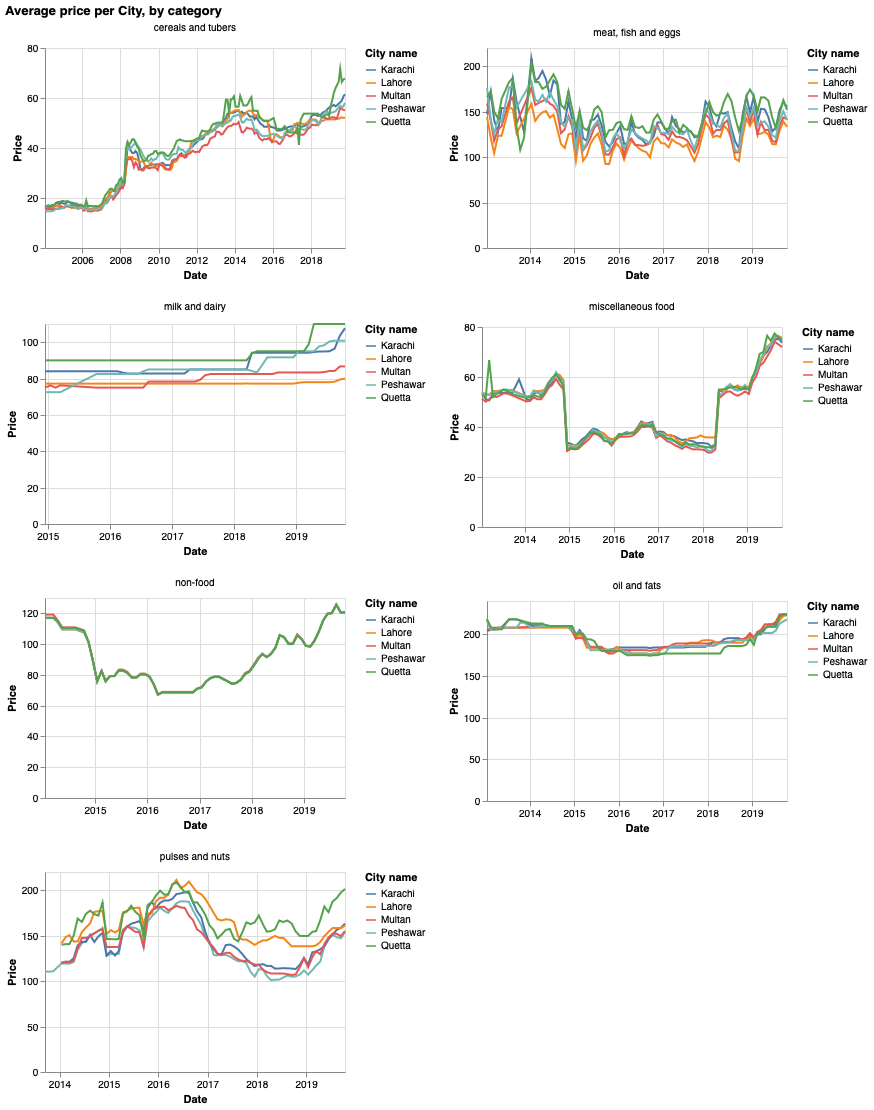

In [56]:
alt.Chart(source).mark_line().encode(
    alt.X("date:T", title="Date"),
    alt.Y("price", title="Price"),
    alt.Color("mktname", title="City name")
).properties(
    width=300, height=200
).facet(alt.Facet('category:N', title=None),
            columns=2
    ).resolve_scale(
        x='independent', 
        y='independent',
        color='independent'
).properties(
    title="Average price per City, by category"
)

### Categories along time, by units of measure

In [57]:
source = pd.pivot_table(df, index=["date", "category", "unit"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source.head(4)

date            category unit    price
0 2004-01-15  cereals and tubers   KG  15.7110
1 2004-02-15  cereals and tubers   KG  15.7790
2 2004-03-15  cereals and tubers   KG  16.0540
3 2004-04-15  cereals and tubers   KG  15.7095

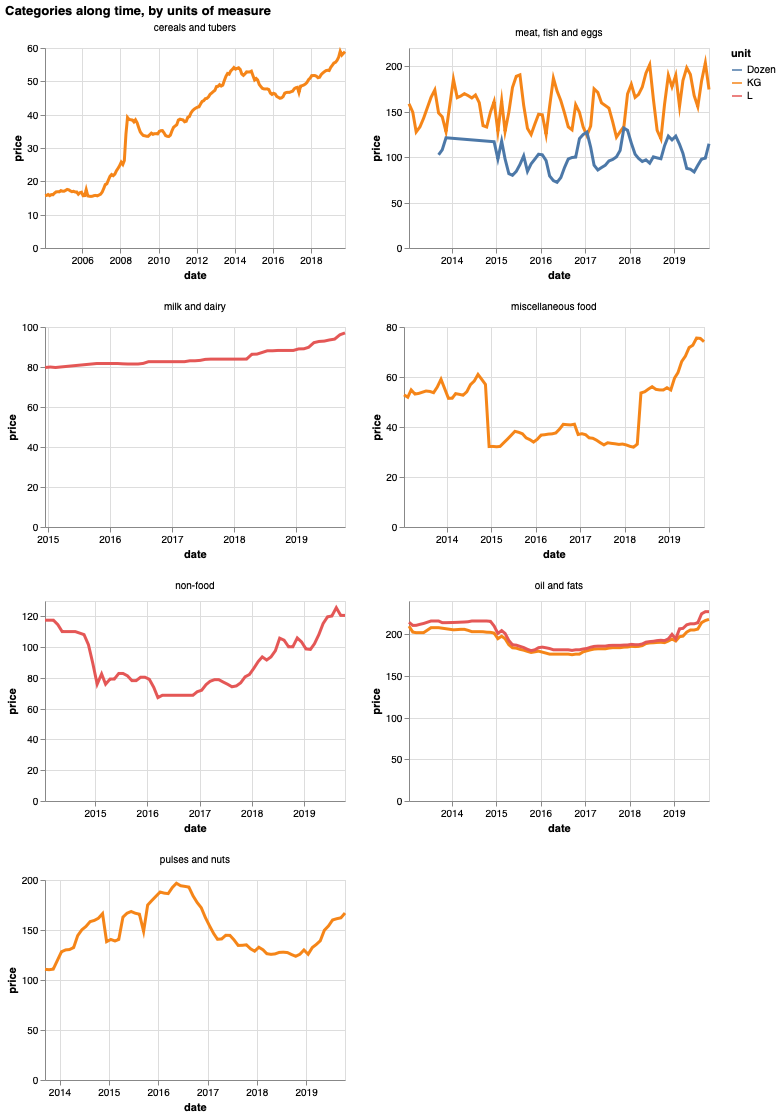

In [58]:
# plot by category
alt.Chart(source).mark_line(size=3).encode(
    alt.X("date:T"),
    alt.Y("price:Q"),
    alt.Color("unit:N")
).properties(
    width=300, height=200
).facet(alt.Facet('category:N', title=None),
            columns=2
    ).resolve_scale(
        x='independent', 
        y='independent',
        #color='independent'
).properties(
    title="Categories along time, by units of measure"
)

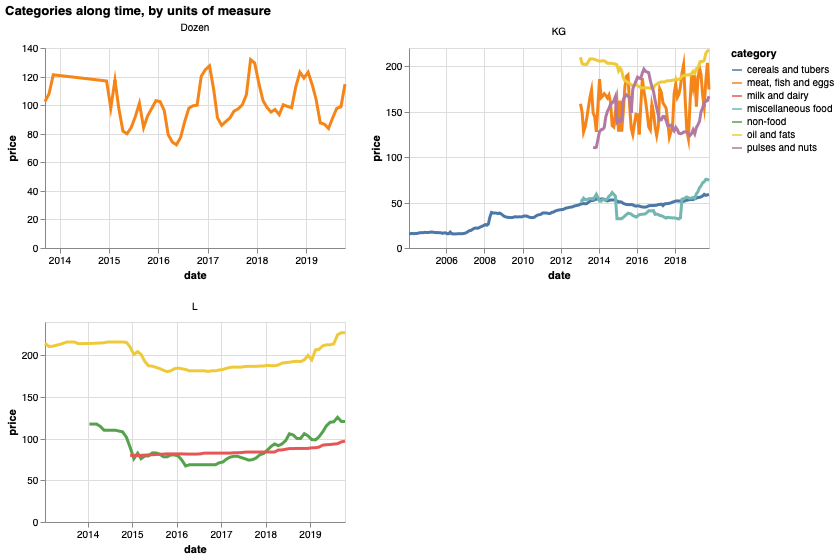

In [59]:
# plot by units
alt.Chart(source).mark_line(size=3).encode(
    alt.X("date:T"),
    alt.Y("price:Q"),
    alt.Color("category:N")
).properties(
    width=300, height=200
).facet(alt.Facet('unit:N', title=None),
            columns=2
    ).resolve_scale(
        x='independent', 
        y='independent',
        #color='independent'
).properties(
    title="Categories along time, by units of measure"
)

### Products along time, by units of measure and categories

In [60]:
source = pd.pivot_table(df, index=["date", "producto", "category", "unit"], values=["price"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source.tail(4)

date       producto            category unit    price
1496 2019-10-15  Rice (coarse)  cereals and tubers   KG  63.1720
1497 2019-10-15          Sugar  miscellaneous food   KG  74.1280
1498 2019-10-15          Wheat  cereals and tubers   KG  38.2760
1499 2019-10-15    Wheat flour  cereals and tubers   KG  45.7326

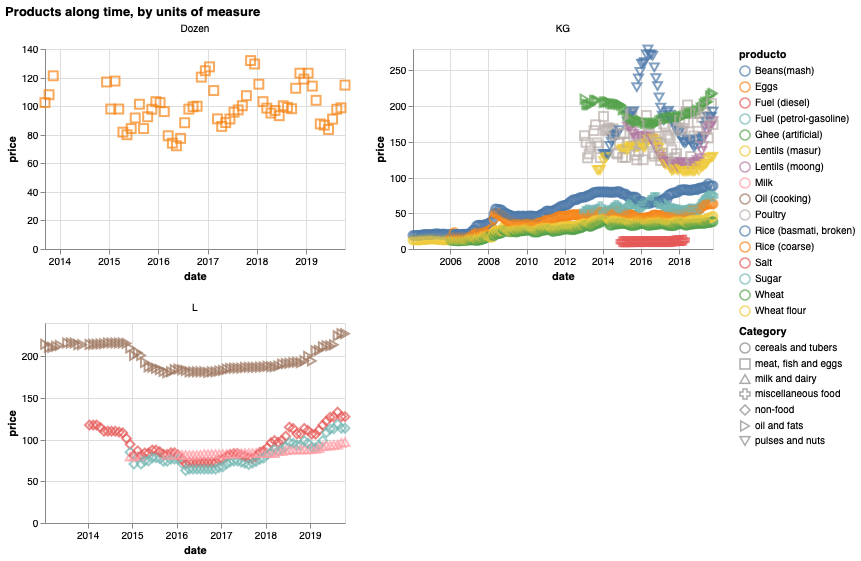

In [61]:
alt.Chart(source).mark_point(size=80).encode(
    alt.X("date:T"),
    alt.Y("price:Q"),
    alt.Color("producto:N"),
    alt.Shape('category:N', title="Category"),
    tooltip=['date', 'producto', 'category', 'price']
).properties(
    width=300, height=200
).facet(alt.Facet('unit:N', title=None),
            columns=2
    ).resolve_scale(
        x='independent', 
        y='independent',
        #color='independent'
).properties(
    title="Products along time, by units of measure"
)

## 6. Additional comments

- Range of `date` variable: looking at the product and price, it looks like the most useful range of information would be between January 2013 and October 2019.
- Use `producto` or `category`?: while we have 16 final food products of the Pakistan's basic basket, the information of category concentrate the information of products in less groups (only 7).


## 7. Save the clean database

In [62]:
# final clean database of food prices
df

date unit            category   price currency   country  \
0    2004-01-15   KG  cereals and tubers   13.00      PKR  Pakistan   
1    2004-02-15   KG  cereals and tubers   13.00      PKR  Pakistan   
2    2004-03-15   KG  cereals and tubers   14.25      PKR  Pakistan   
3    2004-04-15   KG  cereals and tubers   12.50      PKR  Pakistan   
4    2004-05-15   KG  cereals and tubers   13.25      PKR  Pakistan   
...         ...  ...                 ...     ...      ...       ...   
7344 2019-06-15   KG     pulses and nuts  163.22      PKR  Pakistan   
7345 2019-07-15   KG     pulses and nuts  166.92      PKR  Pakistan   
7346 2019-08-15   KG     pulses and nuts  171.42      PKR  Pakistan   
7347 2019-09-15   KG     pulses and nuts  173.66      PKR  Pakistan   
7348 2019-10-15   KG     pulses and nuts  178.50      PKR  Pakistan   

          admname  mktname     producto  
0     Balochistan   Quetta  Wheat flour  
1     Balochistan   Quetta  Wheat flour  
2     Balochistan   Quetta  Wheat flour  
3     Balochistan   Quetta  Wheat flour  
4     Balochistan   Quetta  Wheat flour  
...           ...      ...          ...  
7344        Sindh  Karachi  Beans(mash)  
7345        Sindh  Karachi  Beans(mash)  
7346        Sindh  Karachi  Beans(mash)  
7347        Sindh  Karachi  Beans(mash)  
7348        Sindh  Karachi  Beans(mash)  

[7349 rows x 9 columns]

In [63]:
# save the data
df.to_csv('../data/data_food-prices.csv')  

## 8. References

**Database**
- National Center in Big Data and Cloud Computing (NCBC). (2020). [Pakistan Food Prices](https://opendata.com.pk/dataset/pakistan-food-prices). Open Data Pakistan.

**EDA**
- K. Katari. (Aug 21, 2020).[Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14). Towards Data Science.
- J.M. Reid. (Oct 14, 2021). [13 ways to access data in Python](https://towardsdatascience.com/13-ways-to-access-data-in-python-bac5683e0063). Towards Data Science.
- A.K. Garg, V. Cuspinera-Contreras, Y. Qian. (Oct 2020). [Bike Sharing Machine Learning Model, EDA section](https://github.com/vcuspinera/MDS_Bike_Sharing/blob/master/eda/EDA.ipynb).\n",